In [1]:
"""
@description: perceptron
@author: Zhao Chengcheng
"""

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_data(num):
    """
    @description: 随机生成数据
    @param num: 数据条数
    @return data: 点的坐标
    @return label: 每个点的标签，为：-1 或 +1
    """
    data = [] # 存放随机生成的坐标 Xn
    label = [] # 存放数据的标签， -1 或者 +1
    x1 = np.random.normal(2, 0.8, int(num / 2))
    y1 = np.random.normal(2, 0.8, int(num / 2)) # 在点 (2, 2) 周围生成点
    x2 = np.random.normal(6, 0.8, int(num / 2))
    y2 = np.random.normal(6, 0.8, int(num / 2)) # 在点 (6, 6) 周围生成点，保证生成的点是可被划分的
    for i in range(num):
        if i < num / 2:
            data.append([x1[i], y1[i]])
            label.append(-1)
        else:
            data.append([x2[int(i - num / 2)], y2[int(i - num / 2)]])
            label.append(1)
    return data, label

In [3]:
def perceptron(data, label, eta):
    """
    训练感知机
    @param data: 包含坐标的数据
    @param label: 数据的标签 -1 或者 +1
    @param eta: 学习率
    @return slope: 直线的斜率
    @return intercept: 直线的截距
    """
    w = [0., 1.0] # 直线 x 和 y 的系数
    b = 0.
    separated = False # 标记是否已将点完全分离
    while not separated:
        separated = True
        for i in range(len(data)):
            if label[i] * (w[0] * data[i][0] + w[1] * data[i][1] + b) <= 0:
                separated = False # 没有完全分离
                w[0] += eta * label[i] * data[i][0] # 更新 w 的值
                w[1] += eta * label[i] * data[i][1]
                b += eta * label[i] # 更新 b 的值
    slope = -w[0] / w[1]    # 斜率
    intercept = -b / w[1]   # 截距
    return slope, intercept

In [4]:
def plot(data, label, slope, intercept):
    """
    @description: 画出点和超平面（直线）
    @param data: 点的坐标
    @param label: 点的标签
    @param slope: 直线的斜率
    @param intercept: 直线的纵截距
    """
    plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置字体
    plt.rcParams['axes.unicode_minus'] = False
    plt.xlabel('X')
    plt.ylabel('Y')
    area = np.pi * 2 ** 2 # 点的面积

    data_mat = np.array(data)
    X = data_mat[:, 0]
    Y = data_mat[:, 1]
    for i in range(len(label)):
        if label[i] > 0:
            plt.scatter(X[i].tolist(), Y[i].tolist(), s=area, color='red')  # 画点
        else:
            plt.scatter(X[i].tolist(), Y[i].tolist(), s=area, color='green')
    # 根据斜率和截距画出直线
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals)
    plt.show()

In [12]:
data, label = get_data(100) # 生成数据和标签

In [13]:
slope, intercept = perceptron(data, label, 1) # 训练模型，得到直线的斜率和截距

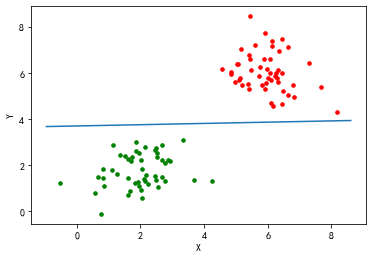

In [14]:
plot(data, label, slope, intercept) # 画出点和直线